In [1]:
# Importing pandas
import pandas as pd

In [2]:
# Setting up dataframe
file = 'Data/london_weather.csv'
df = pd.read_csv(file)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


1. Convert the date column to datetime dtype. Double-check the result. Is it what you expected? If not, be sure to correct it by entering the appropriate format!

In [3]:
# We can run a datetime method for the date column to see results
df['datetime'] = pd.to_datetime(df['date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1970-01-01 00:00:00.019790101
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1970-01-01 00:00:00.019790102
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1970-01-01 00:00:00.019790103


In [4]:
# We need to clear up the datetime entries
# Let's use a format code to make datetime presentable
fmt = "%B %d, %Y"
df.loc[0,'datetime'].strftime(fmt)

'January 01, 1970'

In [5]:
# Better. Now we will define a new column with clean format
df['datetime_fmt'] = df['datetime'].dt.strftime(fmt)
df['datetime_fmt'].head()

0    January 01, 1970
1    January 01, 1970
2    January 01, 1970
3    January 01, 1970
4    January 01, 1970
Name: datetime_fmt, dtype: object

In [6]:
# This isn't displaying proper order
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['datetime'].head()

0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
Name: datetime, dtype: datetime64[ns]

In [7]:
# Setting index as datetime
df = df.set_index('datetime')
df = df.drop(columns = ['datetime_fmt','date'])
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [8]:
### Select only from years 2000 onward.
### We also only want the following columns: precipitation, mean_temp, min_temp, max_temp, snow_depth
df = df.loc['2000-01-01':]
df = df.drop(columns = ['cloud_cover', 'sunshine', 'global_radiation', 'pressure'])
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


### What is the lowest temperature of {max temp} degrees occurred on {date as "MonthName 2-digit-day, 4-digit year}?

### Which was a {day of the week}?

In [9]:
# defining all terms
min_temp = df['max_temp'].min()
lowest_high = df['max_temp'].idxmin()
lowest_high

Timestamp('2018-02-27 00:00:00')

In [10]:
date = lowest_high.strftime(fmt)
date

'February 27, 2018'

In [11]:
print(f'The lowest temperature of {min_temp} degrees occurred on {date}, which was a {lowest_high.day_name()}.')

The lowest temperature of -1.2 degrees occurred on February 27, 2018, which was a Tuesday.


# Time Series Visualizations

In [47]:
ts = df['mean_temp'].copy()
ts = ts.loc['2013-01-01':'2017-01-01']
ts

datetime
2013-01-01    5.7
2013-01-02    6.5
2013-01-03    8.6
2013-01-04    9.7
2013-01-05    9.4
             ... 
2016-12-28    3.0
2016-12-29    3.0
2016-12-30    1.8
2016-12-31    4.6
2017-01-01    7.5
Name: mean_temp, Length: 1462, dtype: float64

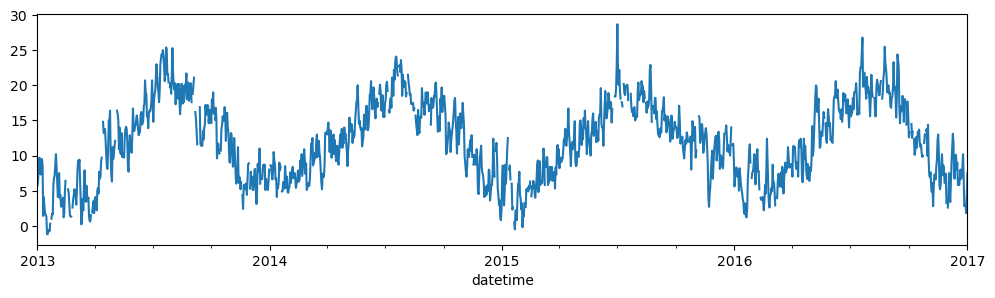

In [48]:
# Here's a simple plot of mean temp
ax = ts.plot();

In [49]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[12.0, 3.0]

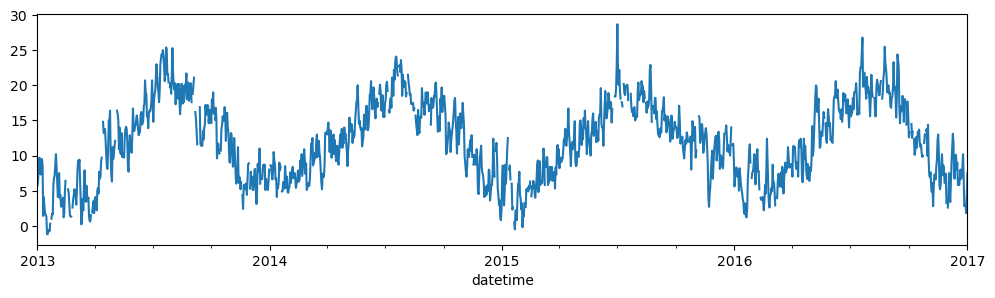

In [50]:
# Here's a simple plot of mean temp
ax = ts.plot();

In [51]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[12.0, 3.0]

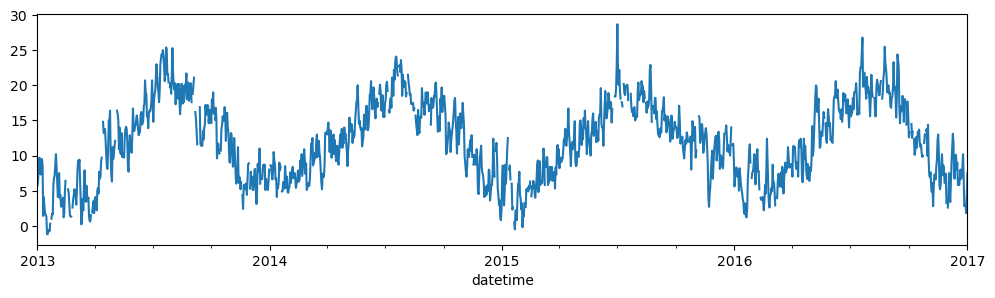

In [52]:
## plot a 12x3 figure
ts.plot(figsize=(12,3));

In [53]:
## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)

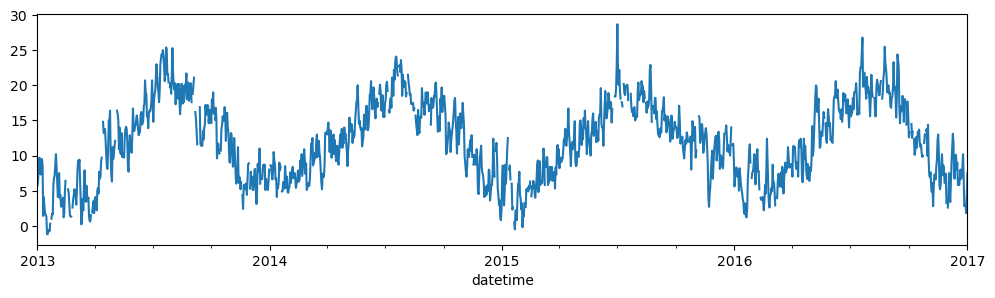

In [54]:
ax = ts.plot();

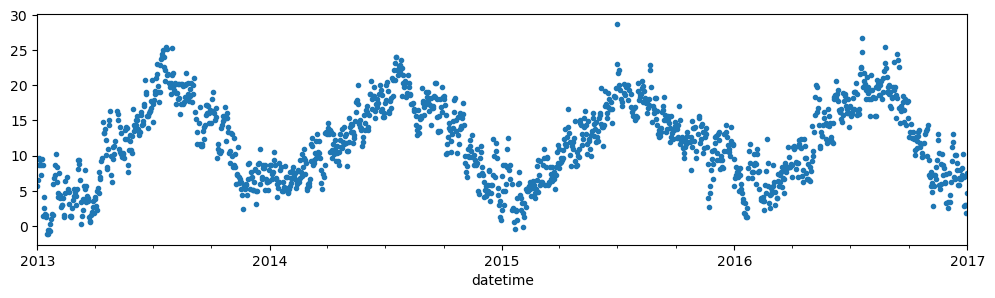

In [55]:
## we can also visualize just the markers without the line
ax = ts.plot(style='.');

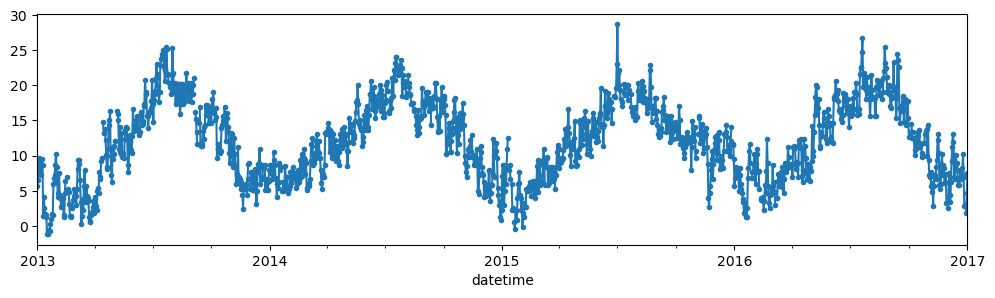

In [56]:
## Using style to add markers
ax = ts.plot(style='.-')

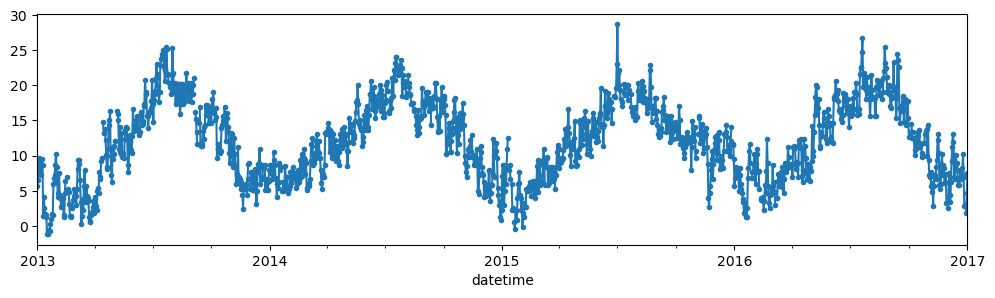

In [57]:
## Using marker to add markers
ax = ts.plot(marker='.')

In [58]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [59]:
## creating our tick locators and formatters
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
# create the formatter to display 3-letter month names + 2-digit year
fmt_months = mdates.DateFormatter("%B-%y")

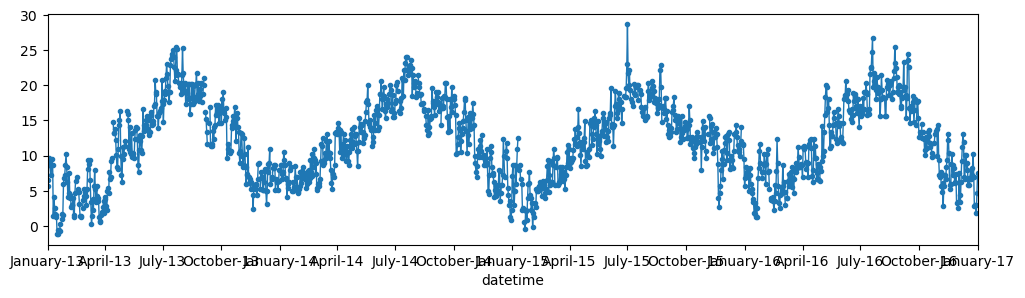

In [60]:
## Plot the time series with pandas
## Adding . markers and a thinner line
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)

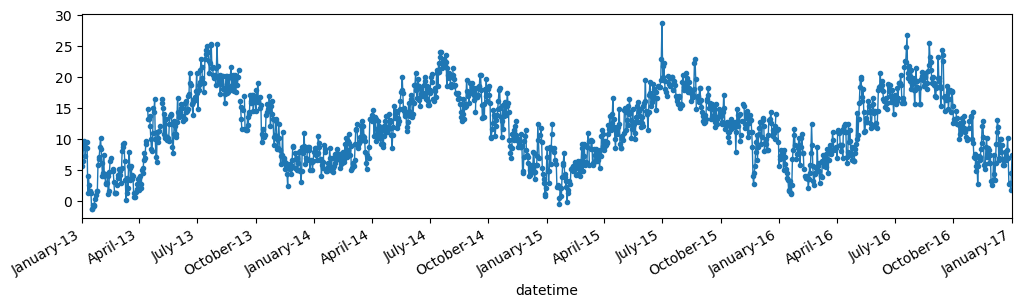

In [61]:
##  Plot the time series with pandas
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)
##  Using ax.get_figure()
fig = ax.get_figure()
fig.autofmt_xdate()

In [62]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

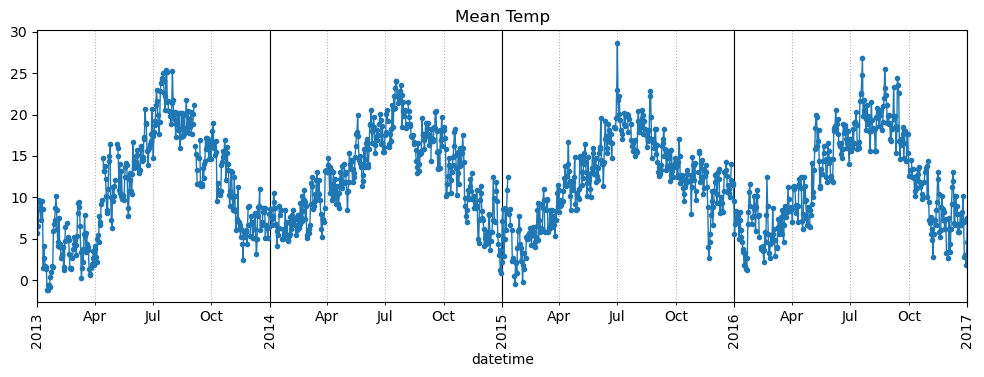

In [63]:
## Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp',marker='.',lw=1)
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_6816\3965544766.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )


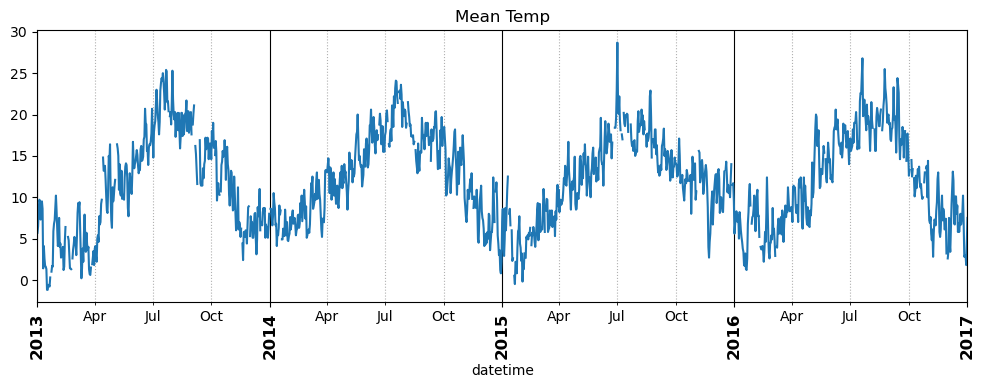

In [64]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  saving current xticks
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

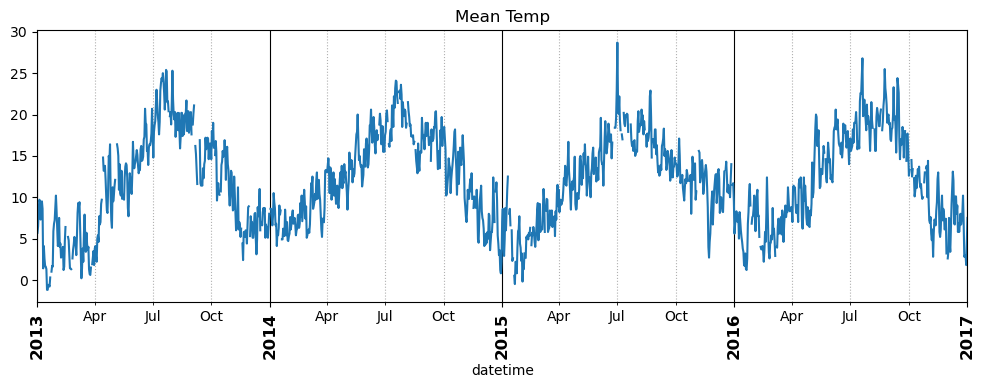

In [65]:
##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,4))
ts.plot(ax=ax,title='Mean Temp');
##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

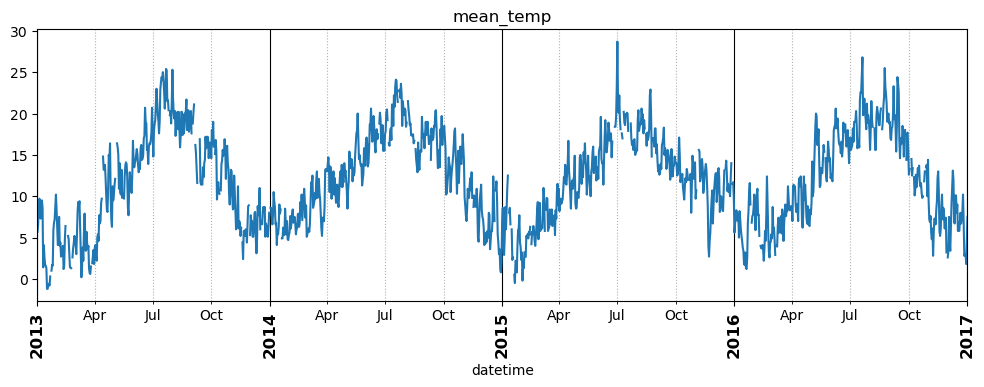

In [66]:
## we've done enough customization that it makes sense to bundle this in a function
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);

# Overhauling Matplotlib Defaults

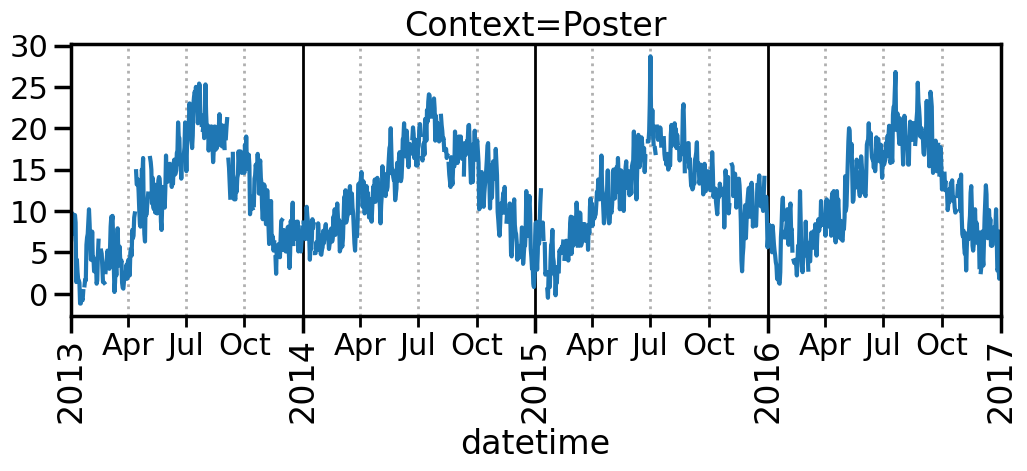

In [67]:
import seaborn as sns
with sns.plotting_context('poster'):    
    fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,title="Context=Poster")

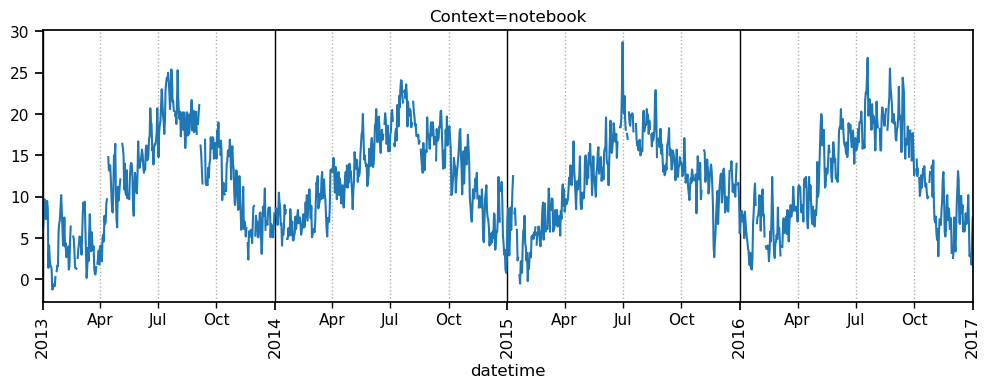

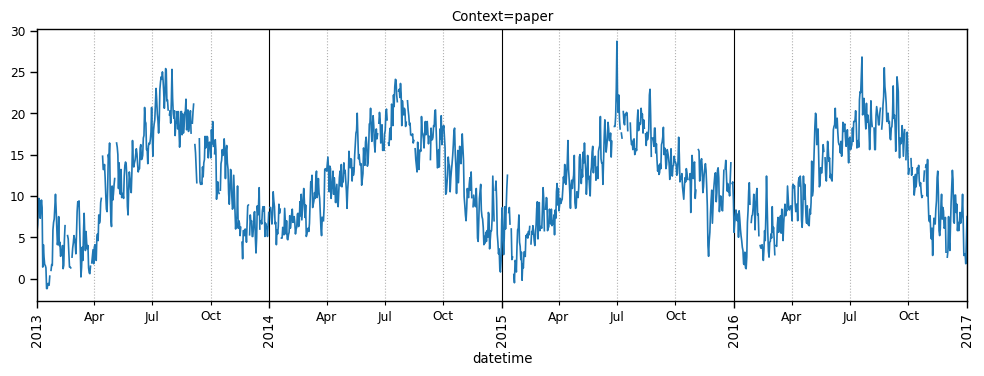

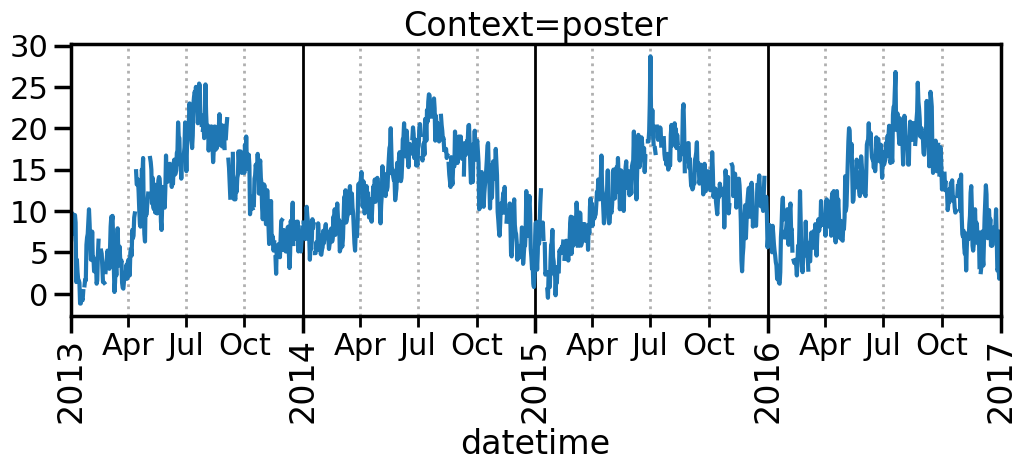

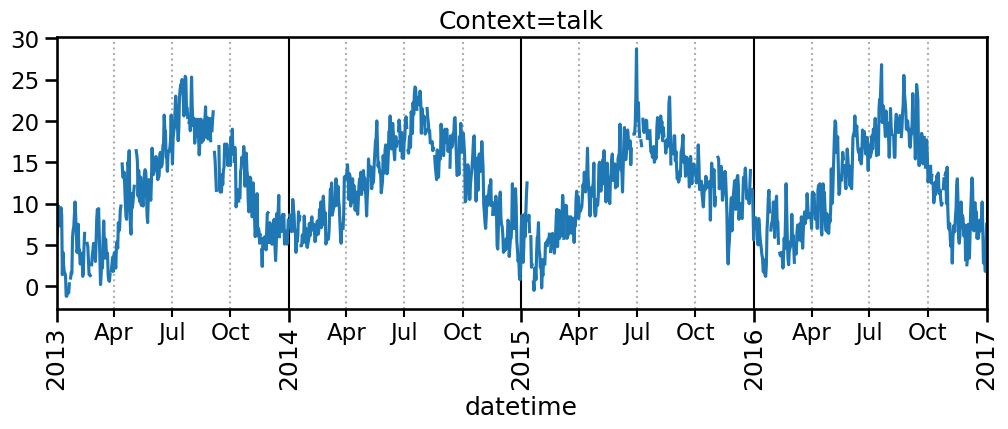

In [68]:
## temporarily changing context
for context in ['notebook','paper','poster','talk']:
    with sns.plotting_context(context):
        fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,
                            title=f"Context={context}")

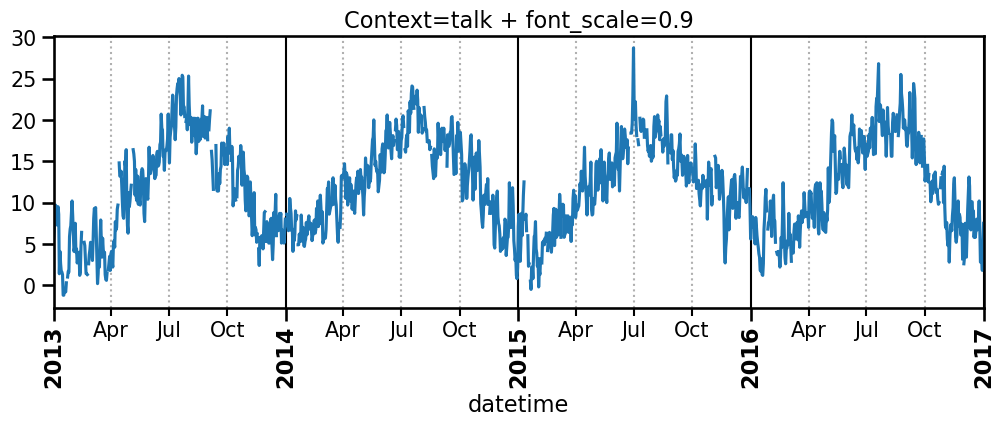

In [69]:
with sns.plotting_context("talk", font_scale=0.9):
    fig,ax = plot_dates(ts,xtick_fontsize=None,
                        xtick_fontweight="bold",
                        title=f"Context=talk + font_scale=0.9")

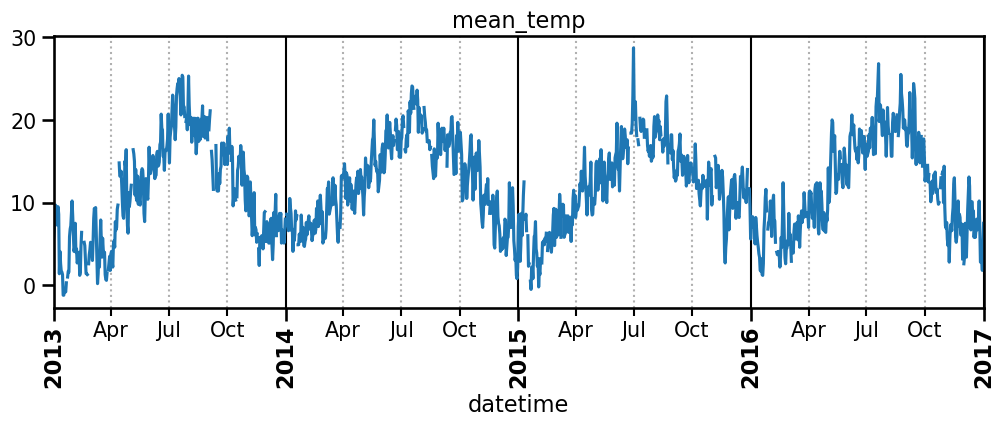

In [70]:
## making the settings permanent for the notebook:
sns.set_context("talk", font_scale=0.9)
fig,ax = plot_dates(ts,xtick_fontsize=None,
                    xtick_fontweight="bold")

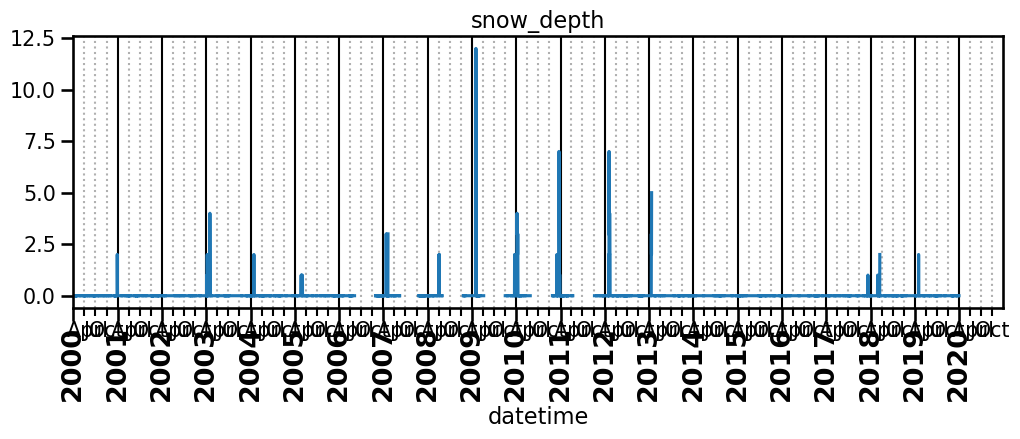

In [72]:
##  Visualize wind_speed instead of meantemp
ts = df['snow_depth'].copy()
plot_dates(ts);

# Resampling and Imputation

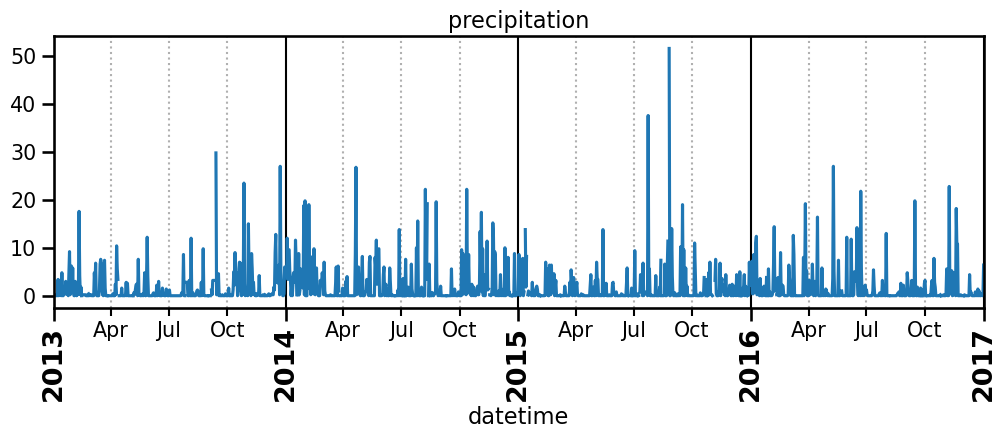

In [74]:
ts = df['precipitation'].copy()
ts = ts.loc['2013-01-01':'2017-01-01']
plot_dates(ts);

In [75]:
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

In [76]:
##  set daily frequency
ts = ts.asfreq('D')
##  preview the index again
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq='D')

In [78]:
##  try making daily data into an hourly frequency
ts_H = ts.asfreq("H")
ts_H

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
                      ... 
2016-12-31 20:00:00    NaN
2016-12-31 21:00:00    NaN
2016-12-31 22:00:00    NaN
2016-12-31 23:00:00    NaN
2017-01-01 00:00:00    6.4
Freq: H, Name: precipitation, Length: 35065, dtype: float64

In [79]:
ts_MS = ts.asfreq("MS")
ts_MS.name = "asfreq"
ts_MS.head()

datetime
2013-01-01    0.0
2013-02-01    0.6
2013-03-01    0.2
2013-04-01    0.0
2013-05-01    0.0
Freq: MS, Name: asfreq, dtype: float64

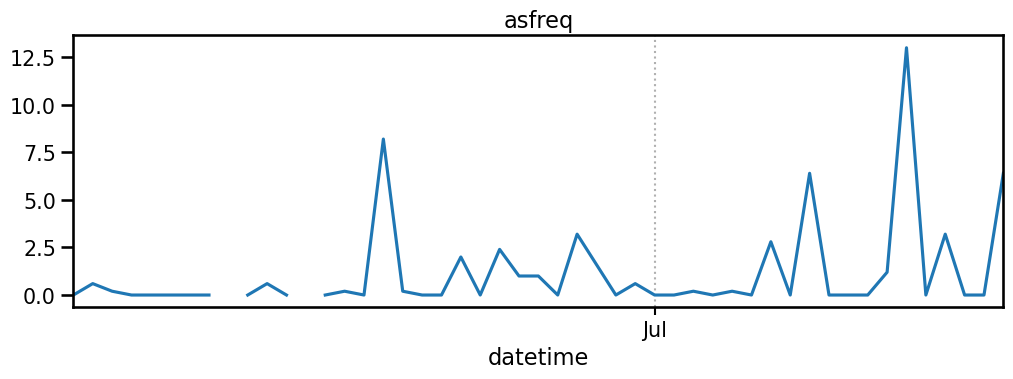

In [80]:
# The above just read data for first of month and dropped rest. Here's a sample visual:
plot_dates(ts_MS);

### Downsampling

In [81]:
ts_MS_res = ts.resample("MS").mean()
ts_MS_res.name = 'Resampled'
ts_MS_res.head()

datetime
2013-01-01    1.630000
2013-02-01    1.312000
2013-03-01    1.760000
2013-04-01    1.020690
2013-05-01    1.406897
Freq: MS, Name: Resampled, dtype: float64

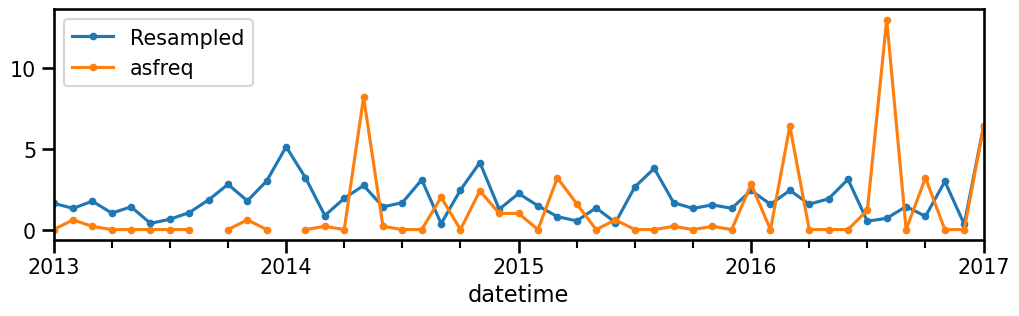

In [82]:
ax = ts_MS_res.plot(style='.-')
ts_MS.plot(style='.-',ax=ax)
ax.legend();

In [83]:
df_ts = df.copy()
agg_dictionary = {'mean_temp':'mean', 'precipitation':'max', 'snow_depth':'max','max_temp':'max'}
df_W = df_ts.resample("W").agg(agg_dictionary)
df_W

,mean_temp,precipitation,snow_depth,max_temp
datetime,,,,
2000-01-02,7.450000,0.2,0.0,11.5
2000-01-09,7.071429,6.0,0.0,11.0
2000-01-16,4.514286,2.8,0.0,10.2
2000-01-23,4.880000,1.2,0.0,7.8
2000-01-30,4.600000,0.0,0.0,12.9
...,...,...,...,...
2020-12-06,5.440000,0.4,NaN,10.2
2020-12-13,4.733333,9.0,NaN,11.2
2020-12-20,9.960000,9.0,NaN,12.6


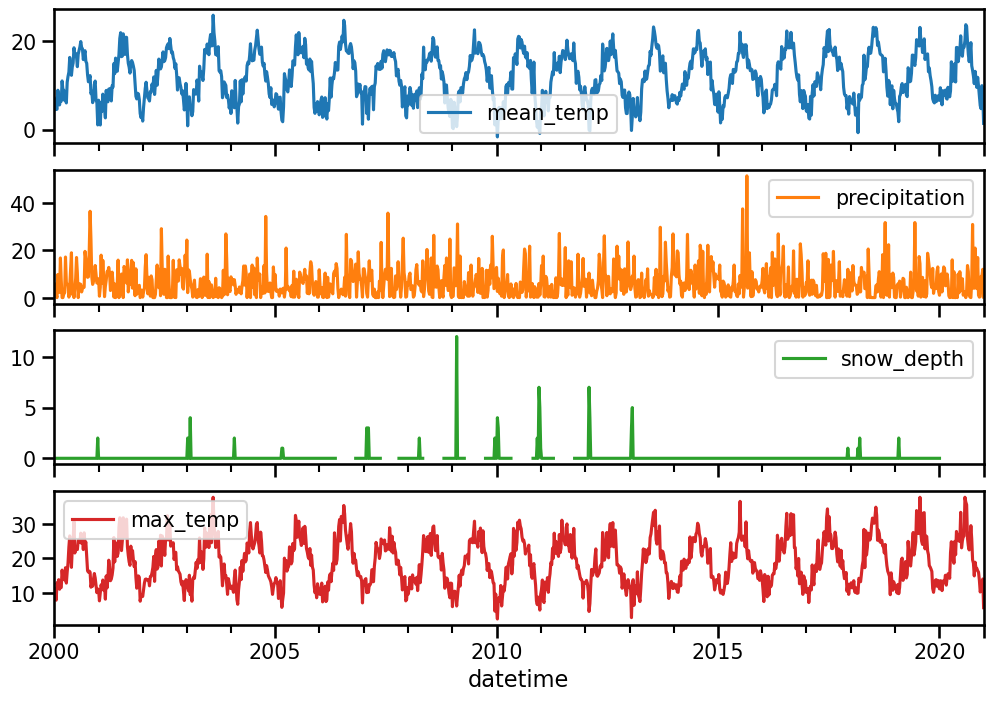

In [84]:
df_W.plot(figsize=(12,8),subplots=True);

### Unsampling

In [85]:
ts_H = ts.resample("H").mean()
ts_H.name = 'Resampled'
ts_H.head()

datetime
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    NaN
2013-01-01 02:00:00    NaN
2013-01-01 03:00:00    NaN
2013-01-01 04:00:00    NaN
Freq: H, Name: Resampled, dtype: float64

<Axes: xlabel='datetime'>

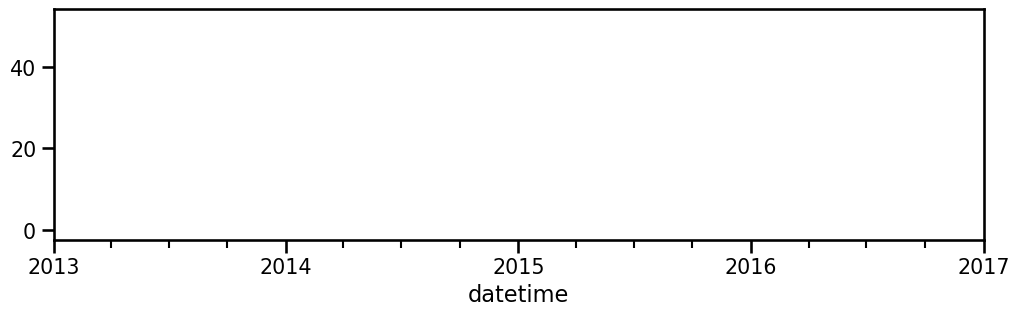

In [86]:
ts_H.plot()

### Handling null values

In [99]:
ts = df['min_temp'].copy()
ts

datetime
2000-01-01    4.9
2000-01-02    5.0
2000-01-03    7.2
2000-01-04    4.4
2000-01-05    1.9
             ... 
2020-12-27    7.6
2020-12-28   -1.3
2020-12-29    1.1
2020-12-30   -0.1
2020-12-31   -3.1
Name: min_temp, Length: 7671, dtype: float64

In [100]:
day_of_week = ts.index.day_name()
day_of_week.value_counts()

Saturday     1096
Sunday       1096
Monday       1096
Tuesday      1096
Wednesday    1096
Thursday     1096
Friday       1095
Name: datetime, dtype: int64

In [101]:
##  removing all sundays and saturdays
ts = ts[ ~day_of_week.isin(['Sunday','Saturday']) ]
ts.index.day_name().value_counts()

Monday       1096
Tuesday      1096
Wednesday    1096
Thursday     1096
Friday       1095
Name: datetime, dtype: int64

In [102]:
ts_D = ts.asfreq("D")
ts_D.head(10)

datetime
2000-01-03    7.2
2000-01-04    4.4
2000-01-05    1.9
2000-01-06    7.0
2000-01-07    3.4
2000-01-08    NaN
2000-01-09    NaN
2000-01-10   -3.3
2000-01-11    0.6
2000-01-12    7.8
Freq: D, Name: min_temp, dtype: float64

In [103]:
ts_D.isna().sum()

2468

In [104]:
##  saving 1 week of values to use for demonstration
example = ts_D.loc['2013-01-01':'2013-01-08']
example

datetime
2013-01-01    3.3
2013-01-02    2.0
2013-01-03    5.7
2013-01-04    9.1
2013-01-05    NaN
2013-01-06    NaN
2013-01-07    7.1
2013-01-08    7.4
Freq: D, Name: min_temp, dtype: float64

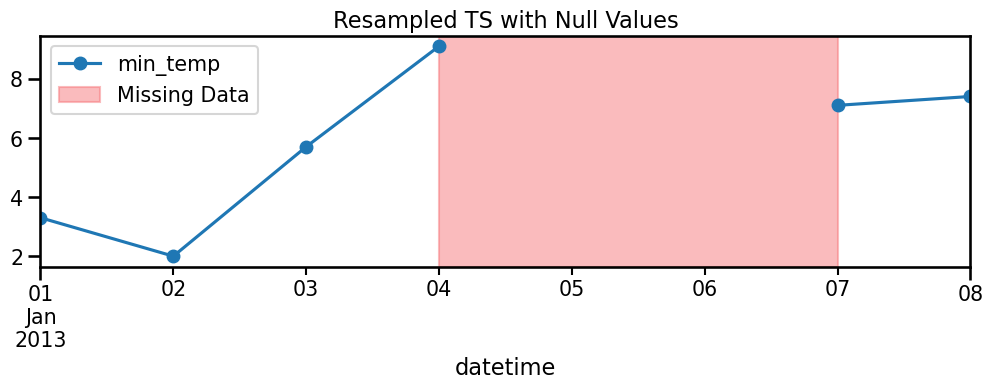

In [105]:
##  Plotting the missing data
ax = example.plot(style='o-', title='Resampled TS with Null Values',)
##  Annotating region with null values to impute
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

#### Forward Fill

datetime
2013-01-01    3.3
2013-01-02    2.0
2013-01-03    5.7
2013-01-04    9.1
2013-01-05    9.1
2013-01-06    9.1
2013-01-07    7.1
2013-01-08    7.4
Freq: D, Name: min_temp, dtype: float64


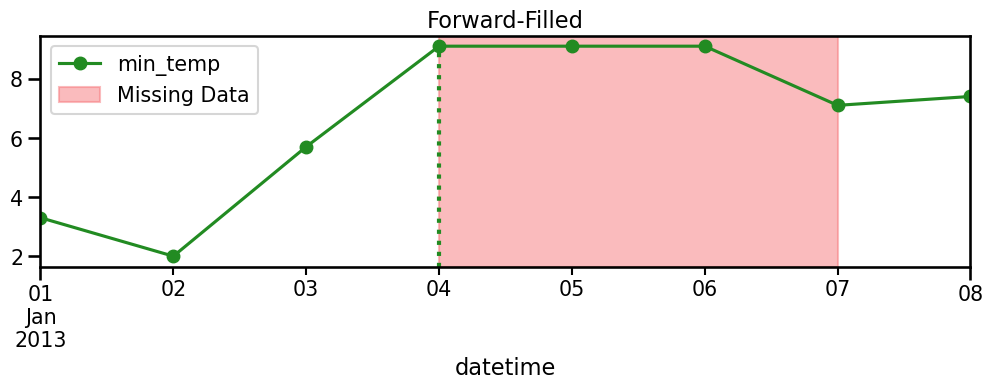

In [106]:
ts_ffill = example.fillna(method='ffill')
print(ts_ffill)
ax = ts_ffill.plot(style='o-',title='Forward-Filled', color='forestgreen');
ax.axvline('01-04-2013',color='forestgreen',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

#### Backward Fill

datetime
2013-01-01    3.3
2013-01-02    2.0
2013-01-03    5.7
2013-01-04    9.1
2013-01-05    7.1
2013-01-06    7.1
2013-01-07    7.1
2013-01-08    7.4
Freq: D, Name: min_temp, dtype: float64


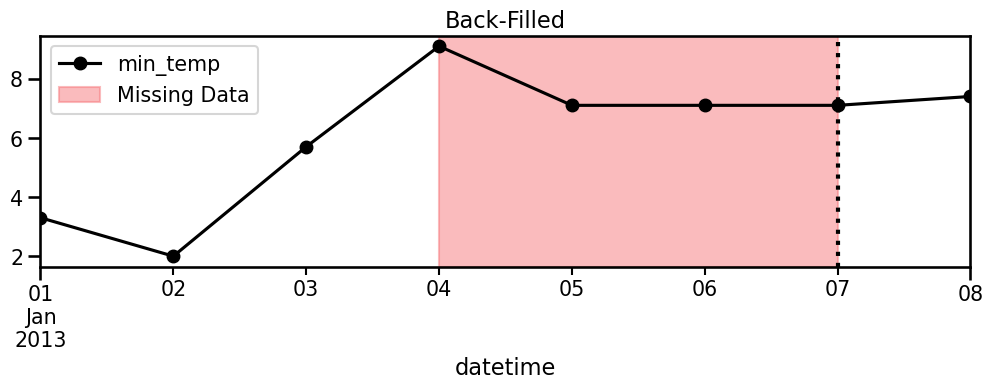

In [107]:
ts_bfill = example.fillna(method='bfill')
print(ts_bfill)
ax = ts_bfill.plot(style='o-',title='Back-Filled',color='k');
ax.axvline("01-07-2013",color='k',lw=3, ls=':')
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

#### Interpolate

datetime
2013-01-01    3.300000
2013-01-02    2.000000
2013-01-03    5.700000
2013-01-04    9.100000
2013-01-05    8.433333
2013-01-06    7.766667
2013-01-07    7.100000
2013-01-08    7.400000
Freq: D, Name: min_temp, dtype: float64


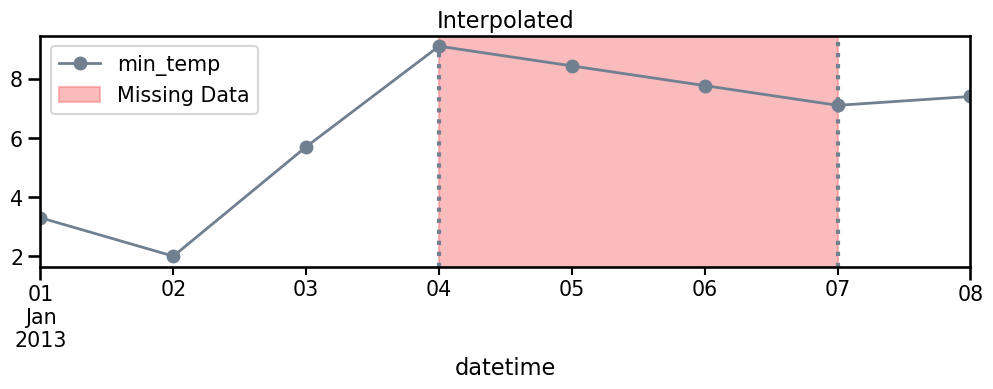

In [108]:
ts_interp = example.interpolate()
print(ts_interp)
ax = ts_interp.plot(style='o-', color='slategray', lw=2,title='Interpolated');
##  annotating start and end values used by interpolate
ax.axvline('01-04-2013', color='slategray',ls=':',lw=3)
ax.axvline('01-07-2013', color='slategray',ls=':',lw=3)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

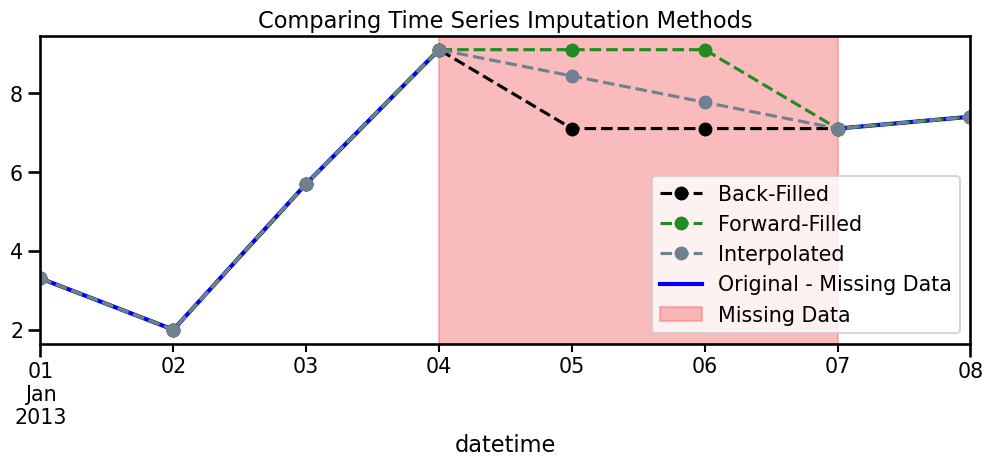

In [109]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue',             lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d',            alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

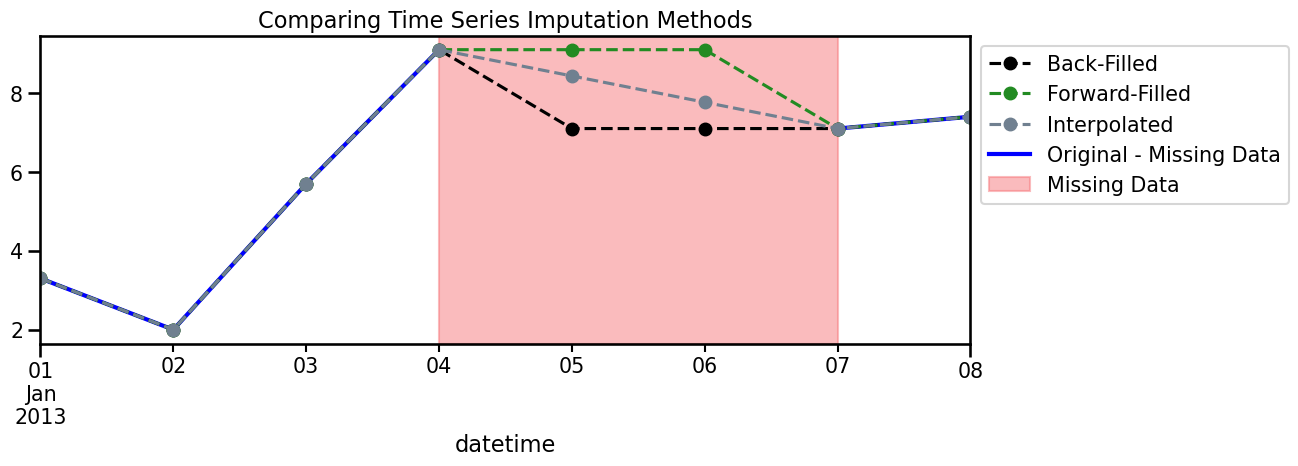

In [110]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Comparing Time Series Imputation Methods')
ts_bfill.plot(style='o--',label='Back-Filled',ax=ax, color='k');
ts_ffill.plot(style='o--',label='Forward-Filled',ax=ax, color='forestgreen');
ts_interp.plot(style='o--',label='Interpolated', ax=ax,color='slategray' );
example.plot(style='-', label='Original - Missing Data',ax=ax, color='blue', lw=3,zorder=-1)
ax.axvspan('01-04-2013','01-07-2013', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend(bbox_to_anchor=[1,1]);